In [1]:
import csv

%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

## READ

In [2]:
y_axis = []
x_axis = []
y_progress = 0

with open("encoder.csv", 'rb') as encoder_data:
    reader = csv.reader(encoder_data)
    for row in reader:
        fy = float(row[0])
        y_progress += (fy / 1000000.00)
        x_axis.append(y_progress)
        y_axis.append(fy)


## Typical Signal

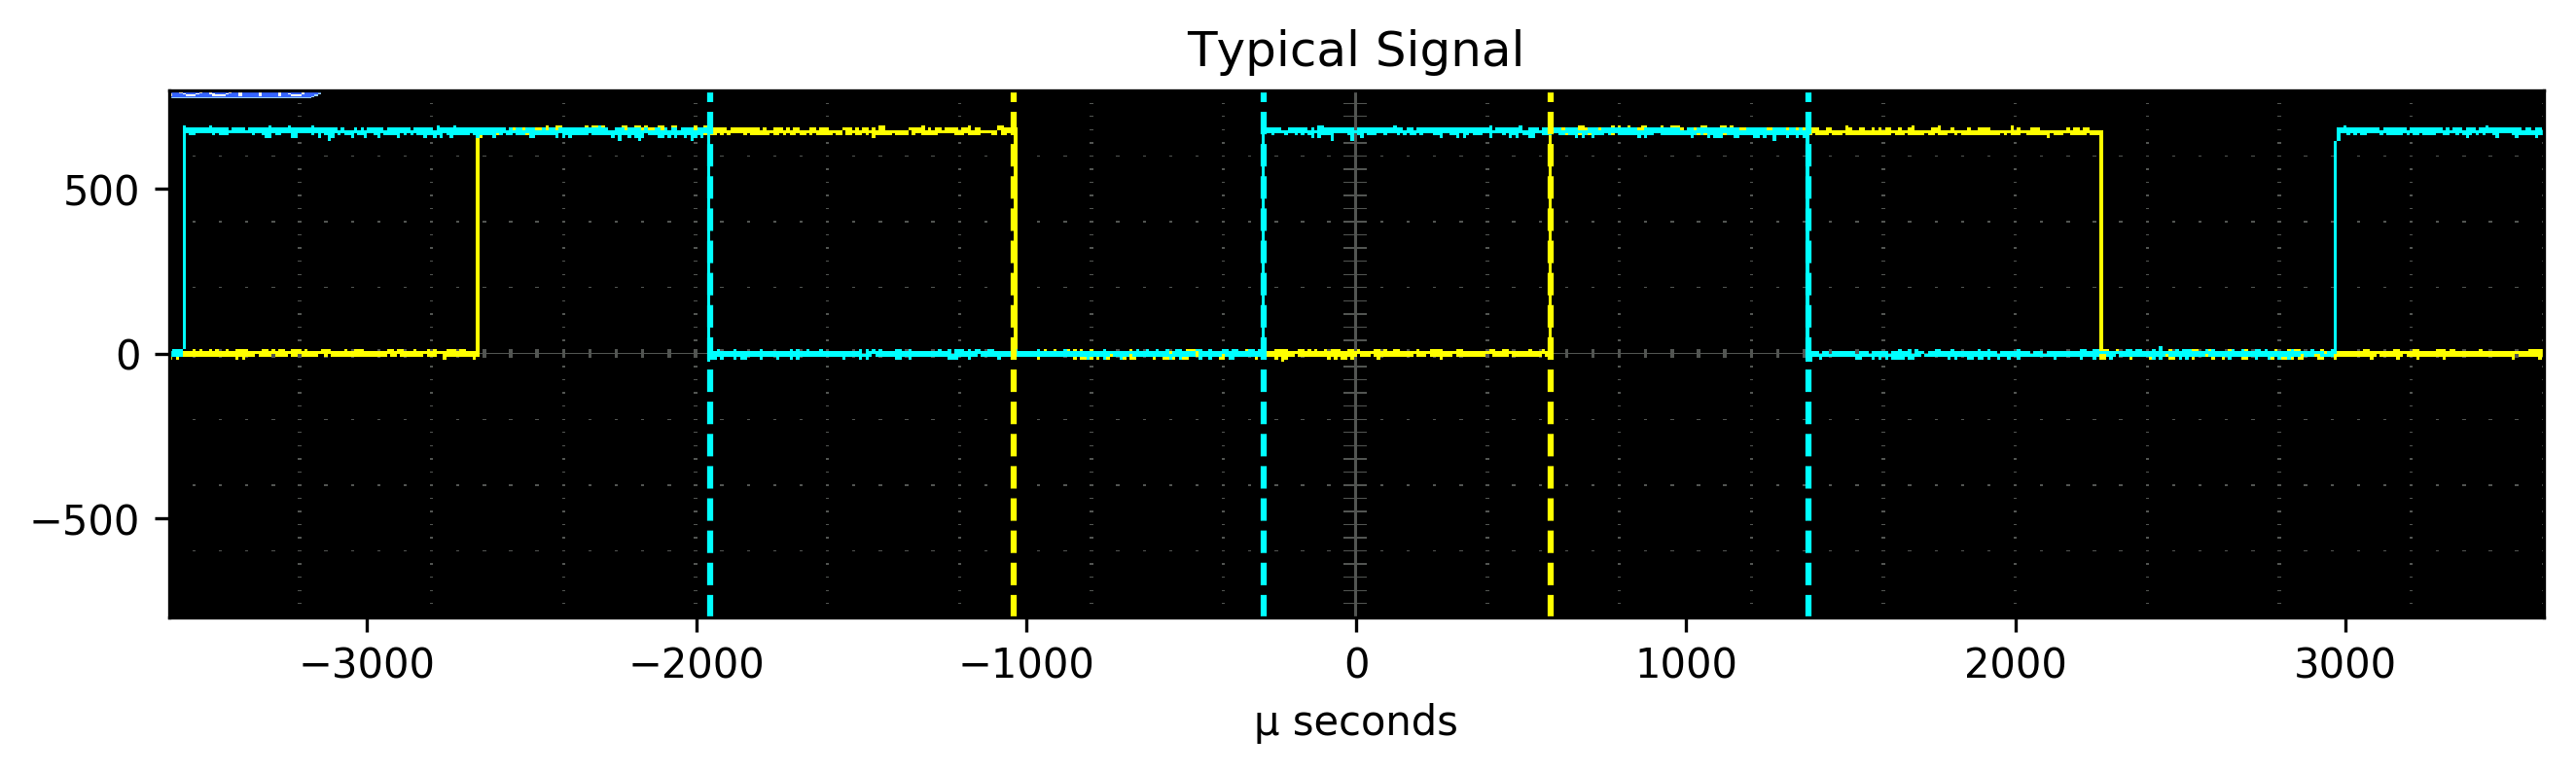

In [51]:
scope_x_tick = 80
left_x = -1960
x_events = [920, 760, 870, 780]
plt.figure(figsize=(10.5, 8), dpi=300)
img = plt.imread("encoder.png")
plt.imshow(img, extent=(-9 * 400,9 * 400,-800,800))
plt.title('Typical Signal')
plt.axvline(x=left_x, color="cyan", linestyle="dashed")
plt.axvline(x=left_x + x_events[0], color="yellow", linestyle="dashed")
plt.axvline(x=left_x + x_events[0] + x_events[1], color="cyan", linestyle="dashed")
plt.axvline(x=left_x + x_events[0] + x_events[1] + x_events[2], color="yellow", linestyle="dashed")
plt.axvline(x=left_x + x_events[0] + x_events[1] + x_events[2] + x_events[3], color="cyan", linestyle="dashed")
plt.xlabel(u"µ seconds")
plt.show()

## Setup Taps

taps sum=1.0


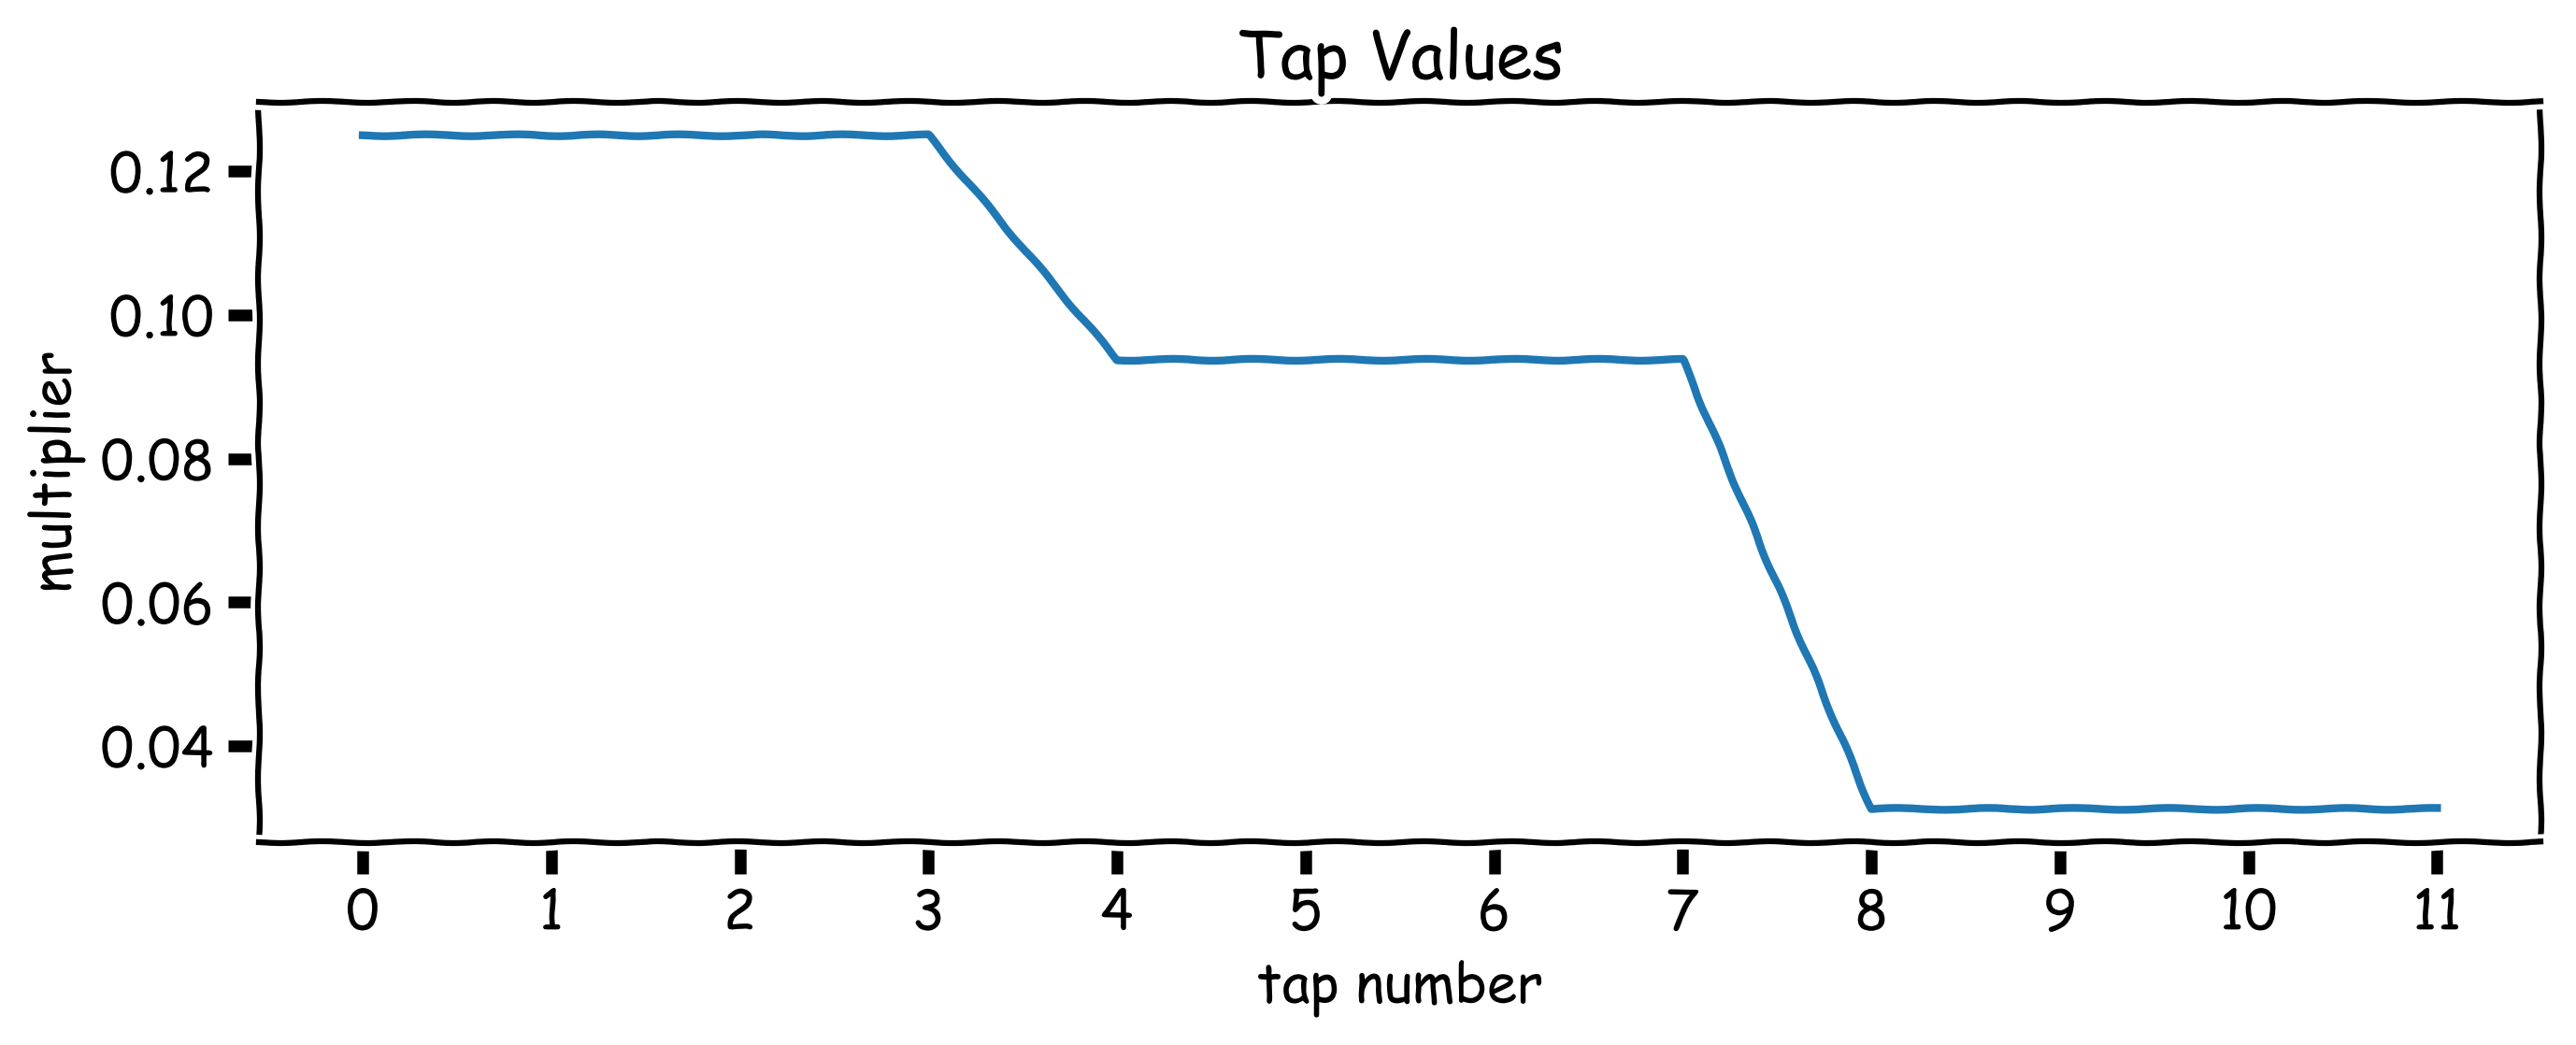

In [3]:

# Taps
a = .50 / 4.00
b = .375 / 4.00
c = .125 / 4.00
taps = [
    a,
    a,
    a,
    a,
    b,
    b,
    b,
    b,
    c,
    c,
    c,
    c,
]

print "taps sum={}".format(sum(taps))

# +--[ Render Taps ]--------------------------------------------------------------#

with plt.xkcd():
    plt.figure(figsize=(10.5, 3.5), dpi=300)
    plt.plot(range(0,len(taps)), taps)
    plt.title('Tap Values')
    plt.xticks(range(0,len(taps)))
    plt.xlabel("tap number")
    plt.ylabel("multiplier")
    plt.show()


## Filter

In [4]:

# Wheel Circm. == 114mm
# Gear Ratio == 150
# Counts == 12

event_distance_mm = (1 / (150.00 * 12.00)) * 114.00
y_axis = [event_distance_mm / (y_axis[t] / 1000000.00) for t in range(0, len(y_axis))]

# Value provider for taps
z = lambda i, data: 0 if i < 0 else data[i]

def ffir(i, data) :
    '''
    len(taps) tap FIR filter
    '''
    return sum([taps[ti] * z(i-ti, data) for ti in range(0, len(taps))])


## Render Unfiltered Data

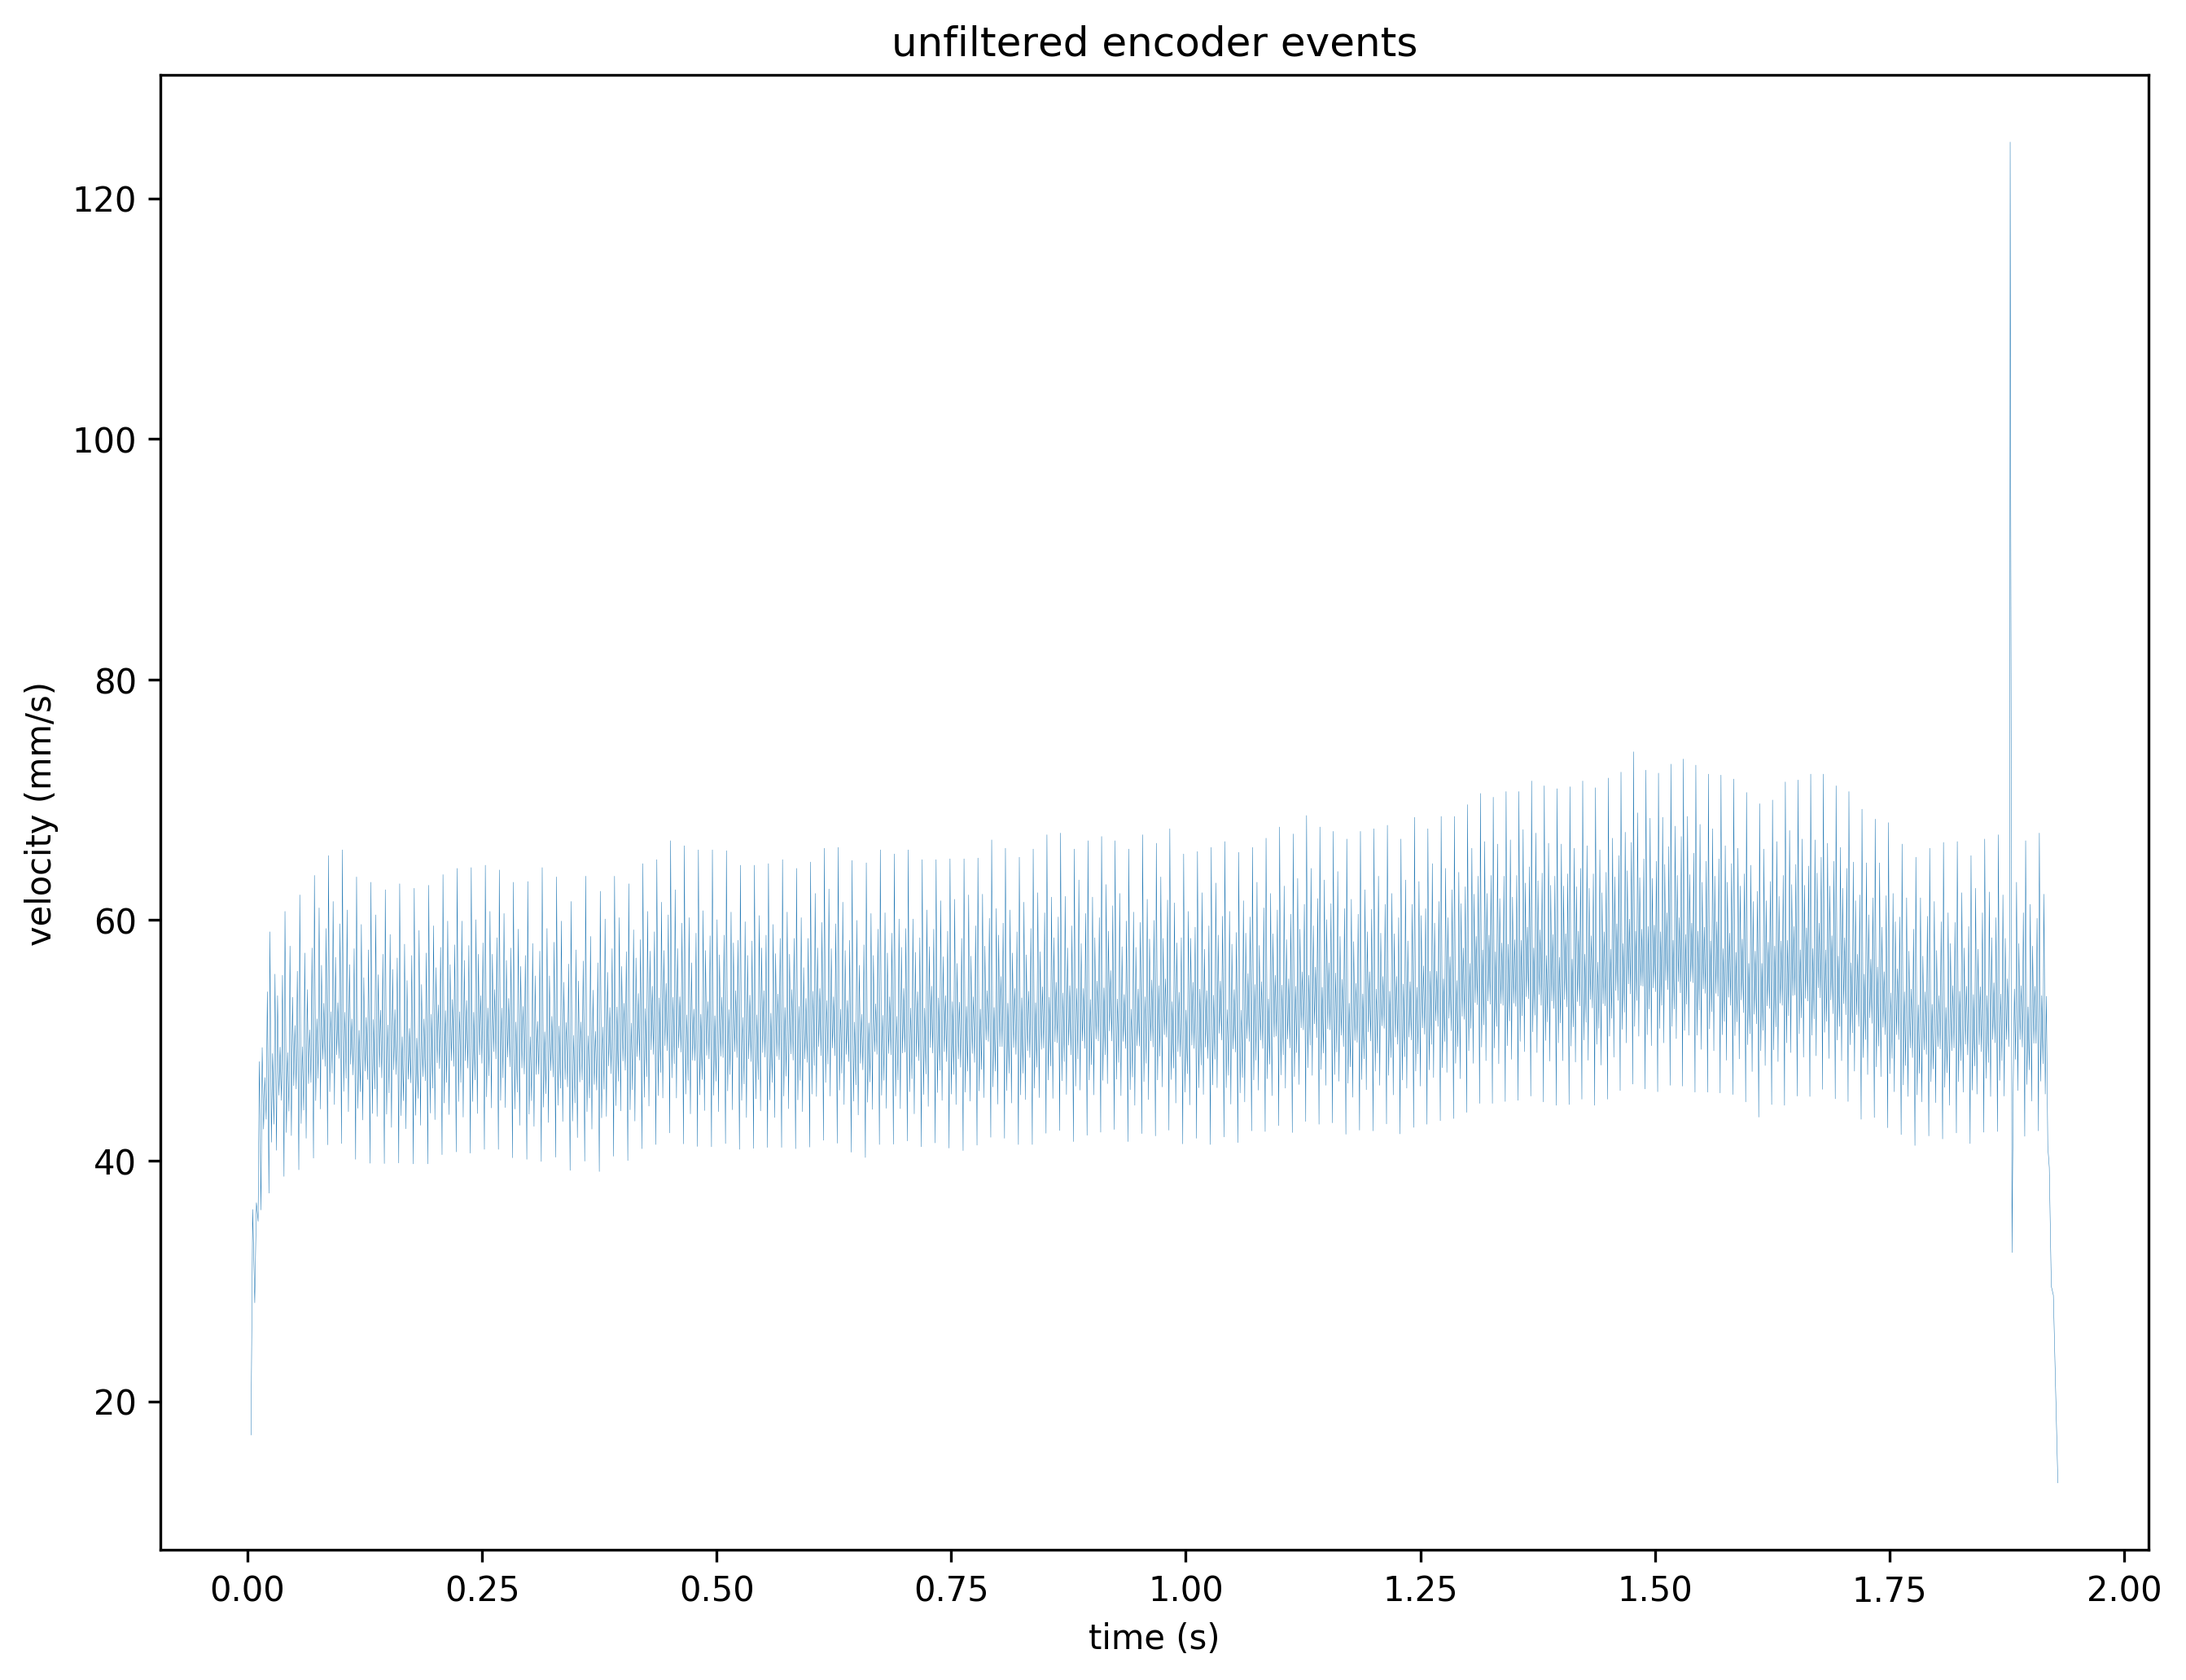

In [9]:
plt.figure(figsize=(10.5, 8), dpi=300)
plt.plot(x_axis, y_axis, linewidth=.25)
plt.title('unfiltered encoder events')
plt.xlabel("time (s)")
plt.ylabel("velocity (mm/s)")
plt.show()

## Render Filtered Data

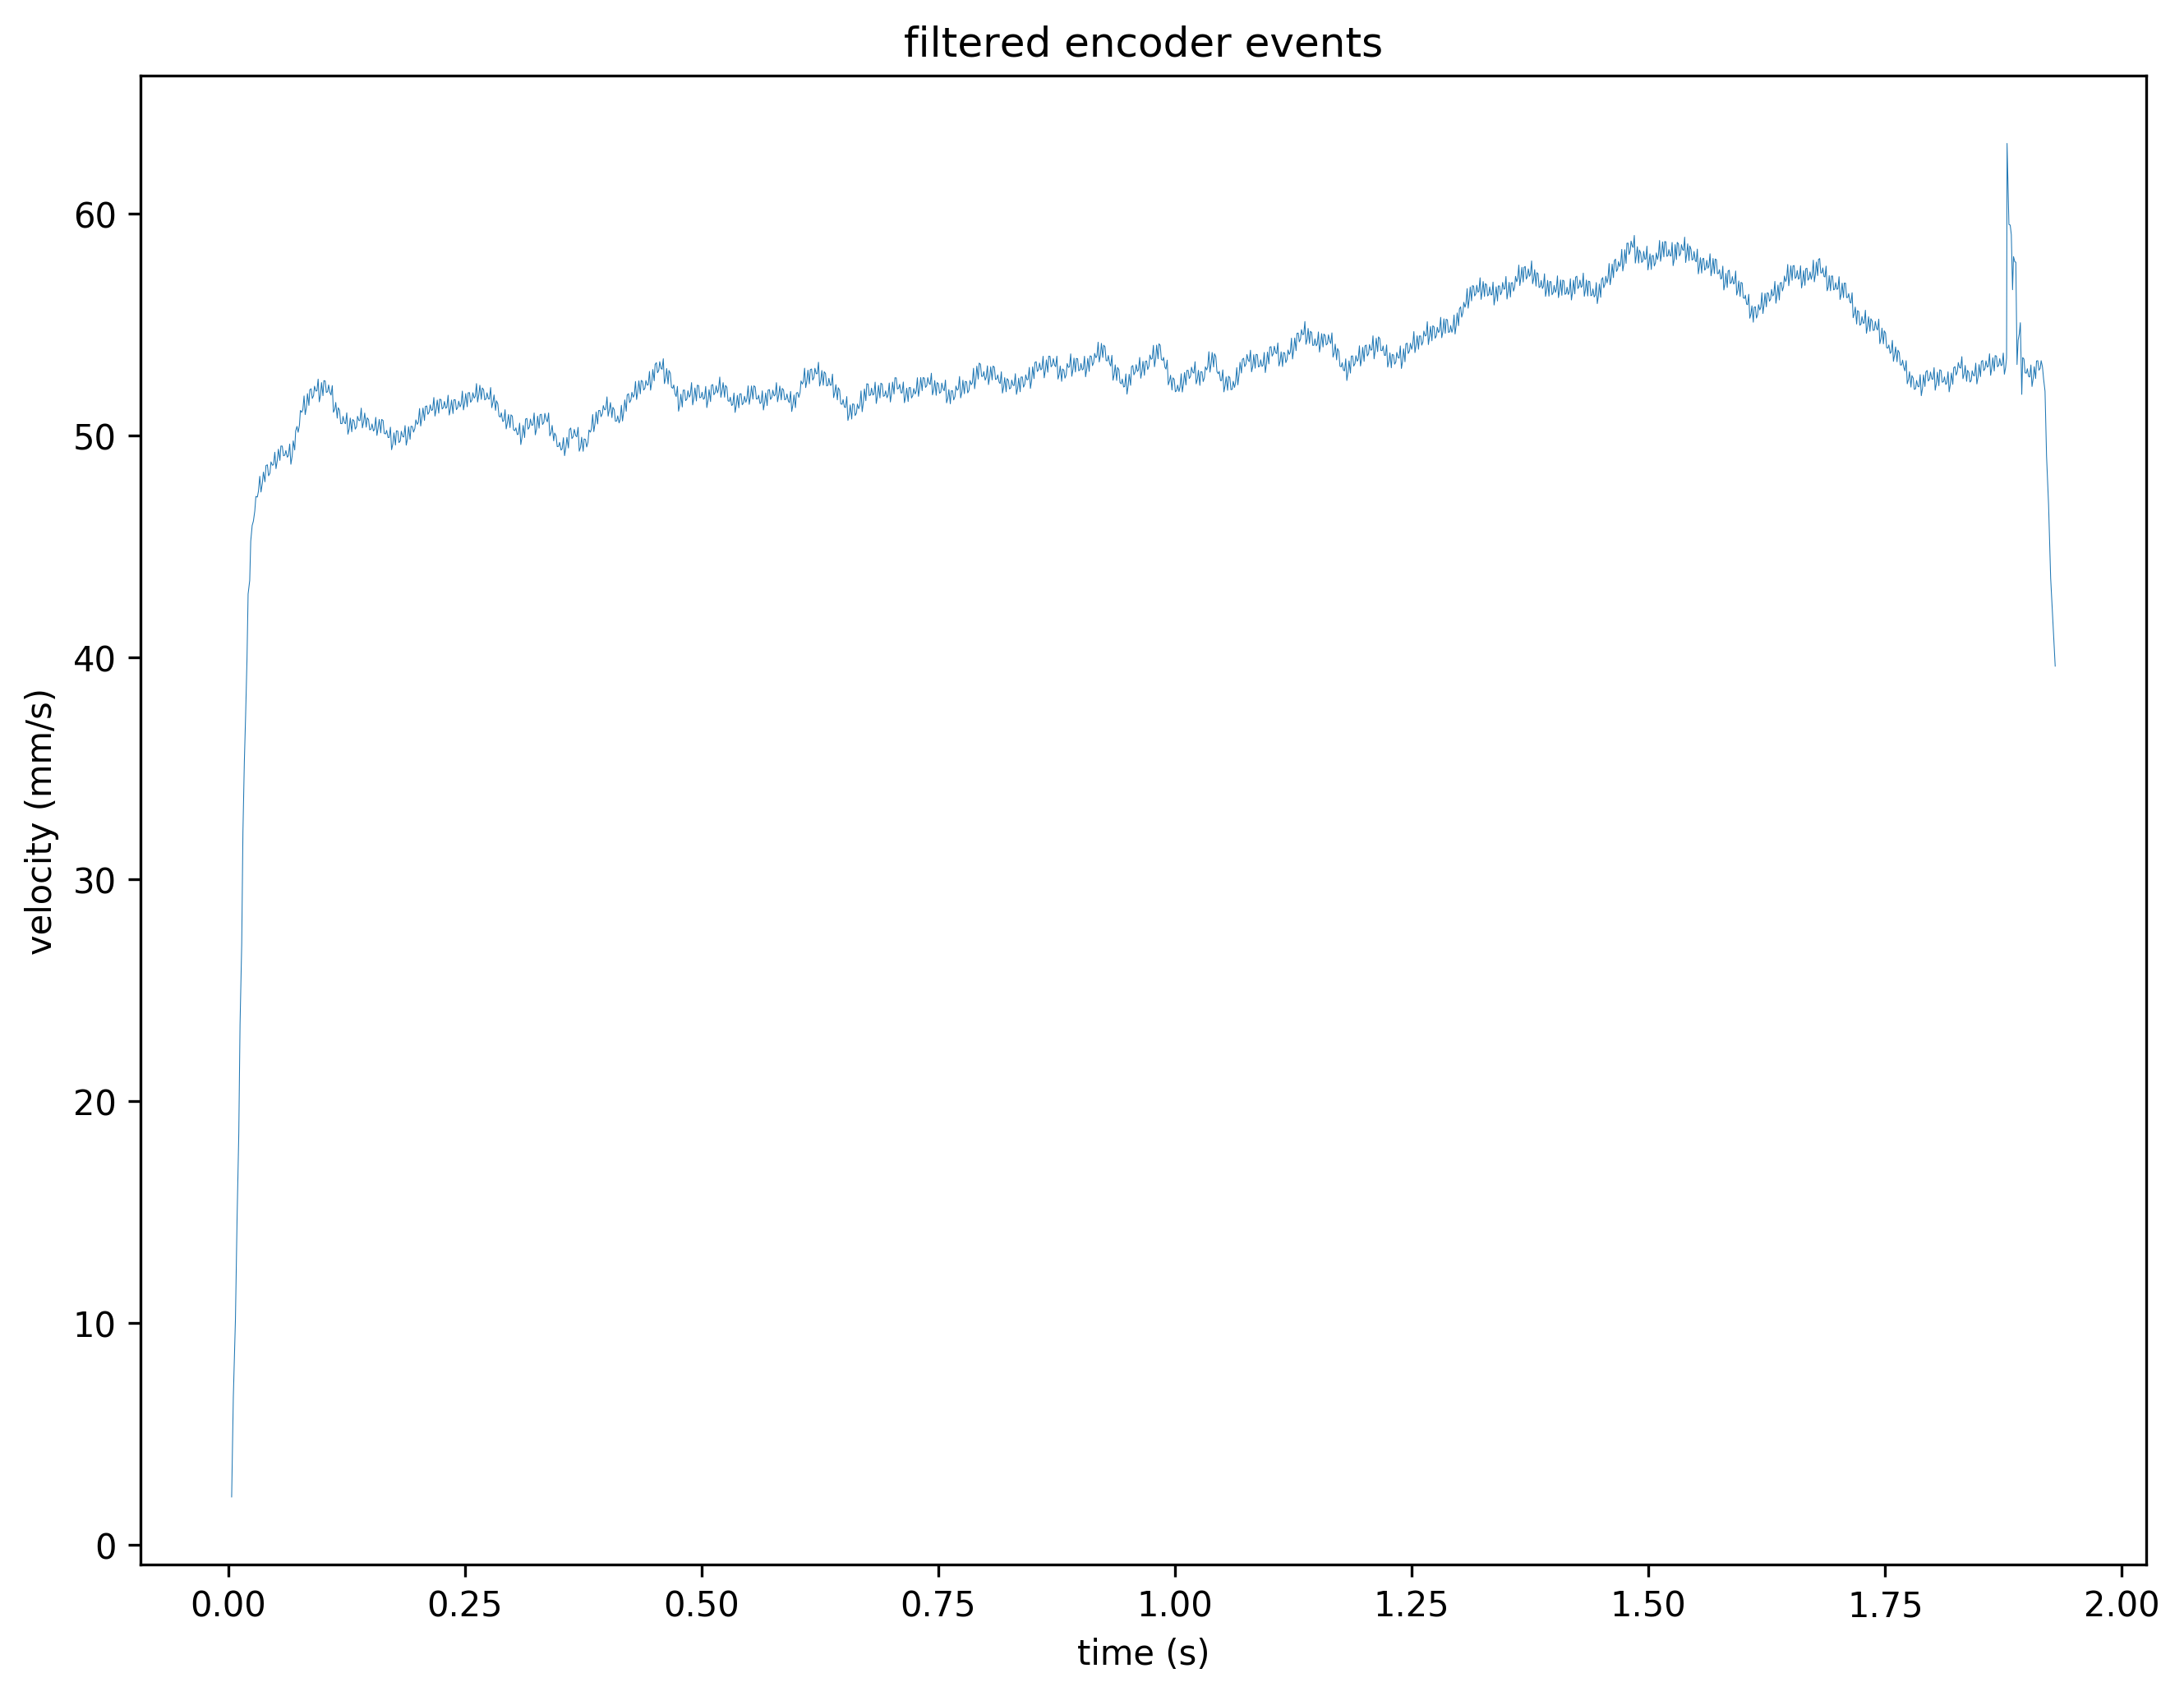

In [10]:
plt.figure(figsize=(10.5, 8), dpi=300)
plt.plot(x_axis, [ ffir(i, y_axis) for i in range(0, len(y_axis)) ], linewidth=.25)
plt.title('filtered encoder events')
plt.xlabel("time (s)")
plt.ylabel("velocity (mm/s)")
plt.show()
